DSA 210 PROJECT      Cem Furkan Çetin

#Upload the Data to Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 📁 Step 1: Mount Google Drive

We begin by mounting Google Drive to access the `.tsv` and `.zip` files needed for IMDb ratings and Rotten Tomatoes reviews.


In [ ]:
ratings_path = '/content/drive/MyDrive/title.ratings.tsv.gz'
basics_path = '/content/drive/MyDrive/title.basics.tsv.gz'
zip_path = '/content/drive/MyDrive/rotten_tomatoes_critic_reviews.csv.zip'


## 🧾 Step 2: Define Dataset Paths

We define the file paths for the compressed IMDb ratings, metadata, and Rotten Tomatoes critic reviews.


In [ ]:
import gzip
import shutil
import zipfile


## 📦 Step 3: Import Required Libraries

We import standard Python libraries for file handling, data extraction, and zip management.


In [ ]:
with gzip.open(ratings_path, 'rb') as f_in:
    with open('title.ratings.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with gzip.open(basics_path, 'rb') as f_in:
    with open('title.basics.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()


## 🗃️ Step 4: Extract Data Files

We extract `.tsv` and `.csv` files from the provided compressed archives using `gzip` and `zipfile`.


In [ ]:
import pandas as pd

ratings_df = pd.read_csv('title.ratings.tsv', sep='\t')
basics_df = pd.read_csv('title.basics.tsv', sep='\t', low_memory=False)
rotten_reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

# Optional: preview
print(ratings_df.head())
print(basics_df.head())
print(rotten_reviews_df.head())


      tconst  averageRating  numVotes
0  tt0000001            5.7      2151
1  tt0000002            5.5       292
2  tt0000003            6.5      2187
3  tt0000004            5.3       187
4  tt0000005            6.2      2933
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12 

## 📂 Step 5: Load Data into DataFrames

We load IMDb ratings, title metadata, and Rotten Tomatoes critic reviews into separate pandas DataFrames.


In [ ]:
import pandas as pd

# Load the metadata and reviews
ratings_df = pd.read_csv('title.ratings.tsv', sep='\t')
basics_df = pd.read_csv('title.basics.tsv', sep='\t', low_memory=False)
rotten_reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

# Preview the data
print(ratings_df.head())
print(basics_df.head())
print(rotten_reviews_df.head())


      tconst  averageRating  numVotes
0  tt0000001            5.7      2151
1  tt0000002            5.5       292
2  tt0000003            6.5      2187
3  tt0000004            5.3       187
4  tt0000005            6.2      2933
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12 

#Step 3: Visualize the Distribution of IMDb Average Ratings

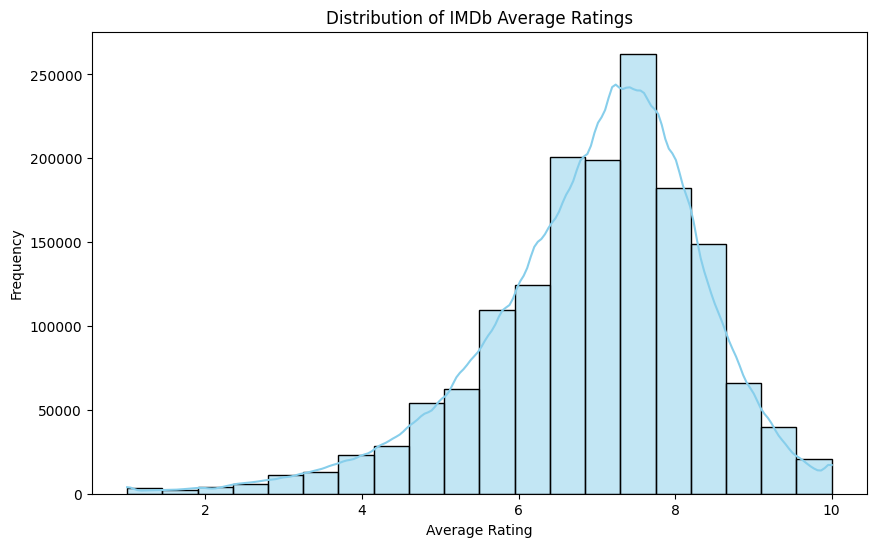

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import shutil

# Step 1: Unzip the ratings file if needed
with gzip.open('/content/drive/MyDrive/title.ratings.tsv.gz', 'rb') as f_in:
    with open('title.ratings.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Step 2: Load the unzipped TSV file into DataFrame
ratings_df = pd.read_csv('title.ratings.tsv', sep='\t')

# Step 3: Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['averageRating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


## 📊 Step 6: Exploratory Data Analysis (Ratings)

We visualize the distribution of IMDb average ratings to identify general rating patterns across titles.


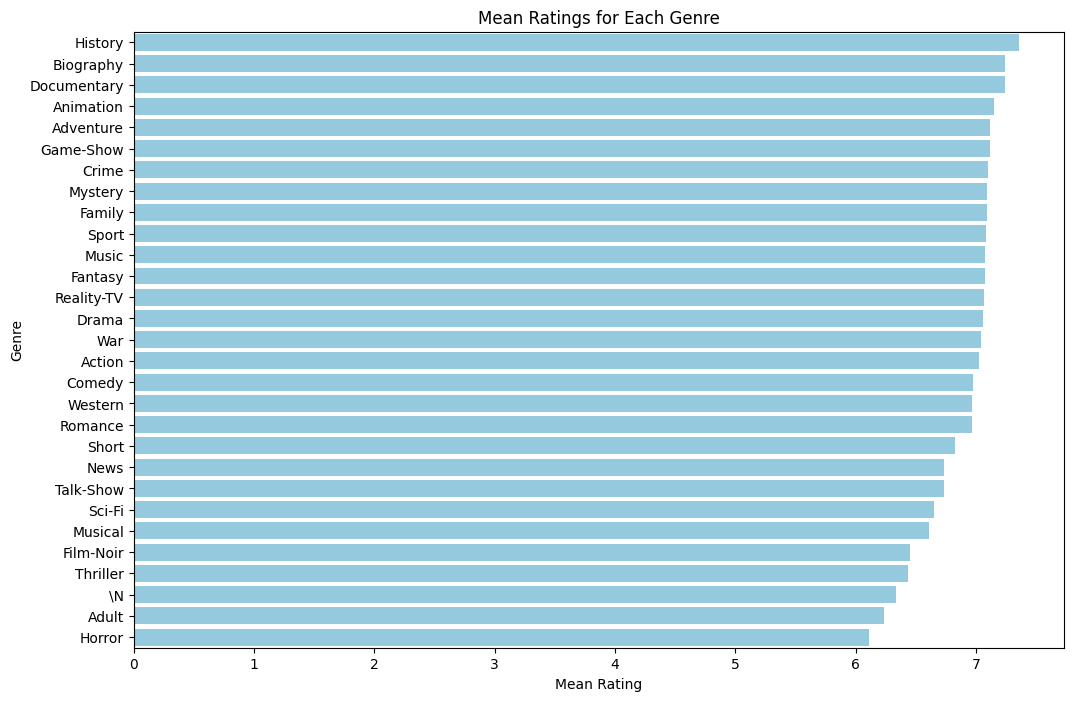

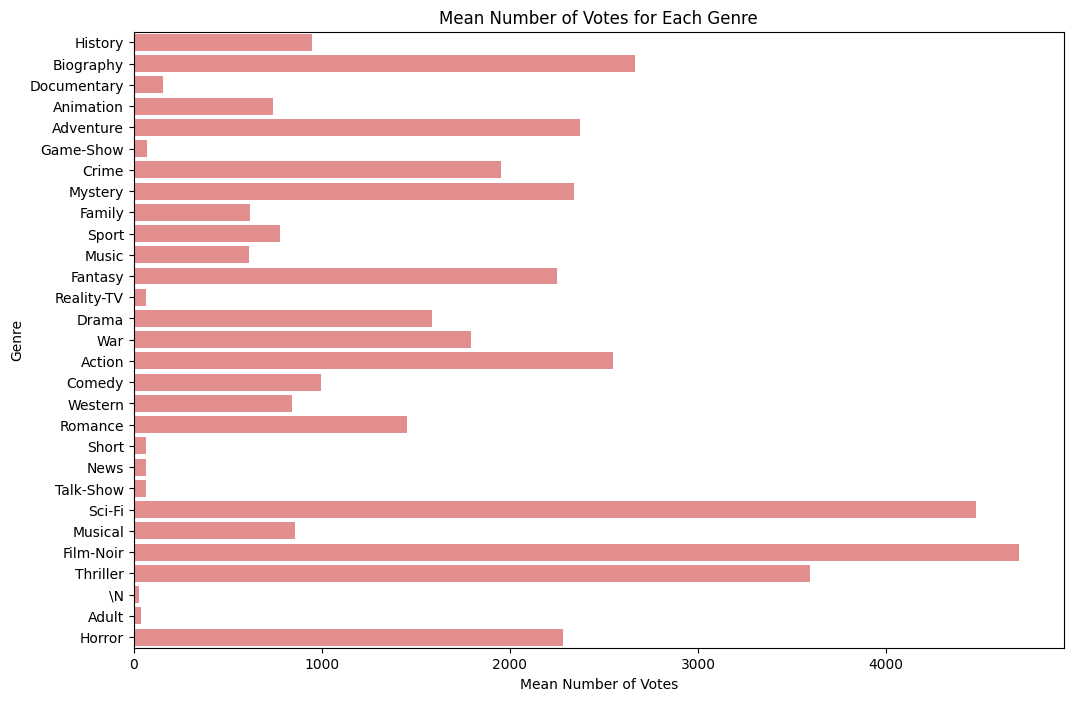

In [ ]:
# Limit columns and load only necessary data
basics_df = pd.read_csv('/content/drive/MyDrive/title.basics.tsv.gz', sep='\t', compression='gzip', usecols=['tconst', 'primaryTitle', 'genres'])
ratings_df = pd.read_csv('/content/drive/MyDrive/title.ratings.tsv.gz', sep='\t', compression='gzip', usecols=['tconst', 'averageRating', 'numVotes'])

# Drop rows with missing genres
basics_df = basics_df.dropna(subset=['genres'])

# Explode genres
exploded_genres_df = basics_df.copy()
exploded_genres_df['genres'] = exploded_genres_df['genres'].str.split(',')
exploded_genres_df = exploded_genres_df.explode('genres')

# Merge exploded genres with ratings
merged_df = pd.merge(exploded_genres_df, ratings_df, on='tconst', how='inner')

# Drop rows with missing ratings (optional)
merged_df = merged_df.dropna(subset=['averageRating', 'numVotes'])

# Group by genre and calculate mean values
genre_rating = merged_df.groupby('genres').agg(
    mean_rating=('averageRating', 'mean'),
    mean_votes=('numVotes', 'mean')
).reset_index()

# Sort by rating
genre_rating_sorted = genre_rating.sort_values(by='mean_rating', ascending=False)

# Plot 1: Mean Ratings for Each Genre
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_rating', y='genres', data=genre_rating_sorted, color='skyblue')
plt.title('Mean Ratings for Each Genre')
plt.xlabel('Mean Rating')
plt.ylabel('Genre')
plt.show()

# Plot 2: Mean Number of Votes for Each Genre
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_votes', y='genres', data=genre_rating_sorted, color='lightcoral')
plt.title('Mean Number of Votes for Each Genre')
plt.xlabel('Mean Number of Votes')
plt.ylabel('Genre')
plt.show()


## 🎭 Step 7: Genre-Based Rating Analysis

We analyze how average ratings and vote counts differ across genres. We first explode genre values into individual rows, then aggregate mean scores and visualize them.


In [ ]:
# First explode the genres into separate rows
exploded_genres_df = basics_df.copy()
exploded_genres_df['genres'] = exploded_genres_df['genres'].fillna('Unknown')
exploded_genres_df = exploded_genres_df.assign(genres=exploded_genres_df['genres'].str.split(','))
exploded_genres_df = exploded_genres_df.explode('genres')


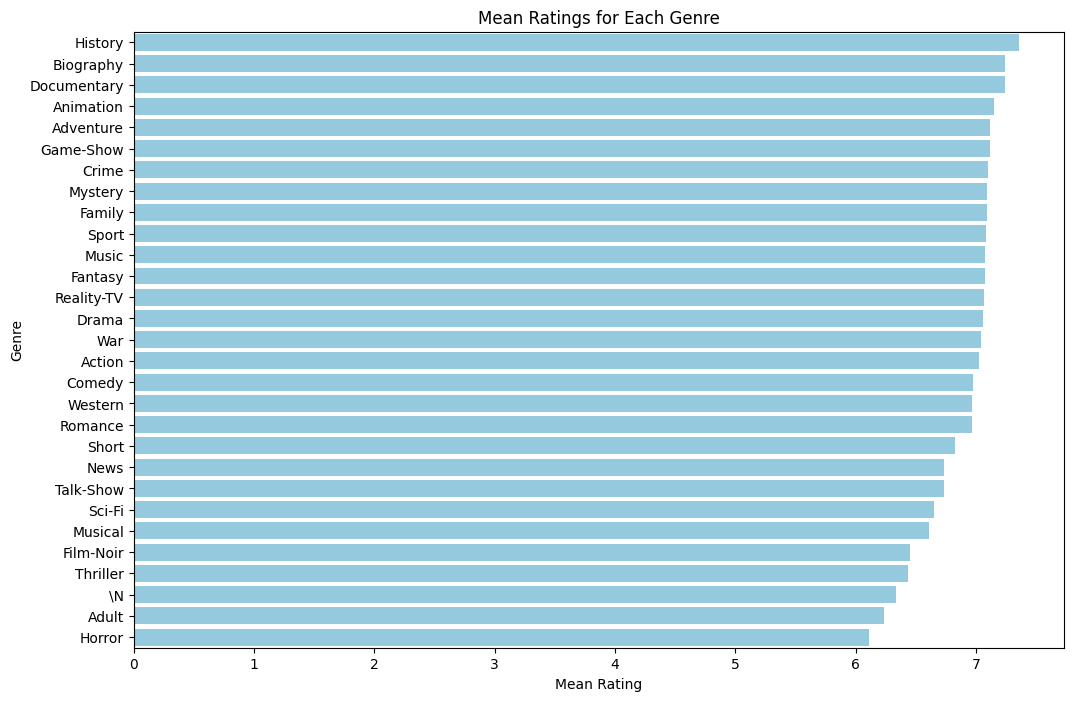

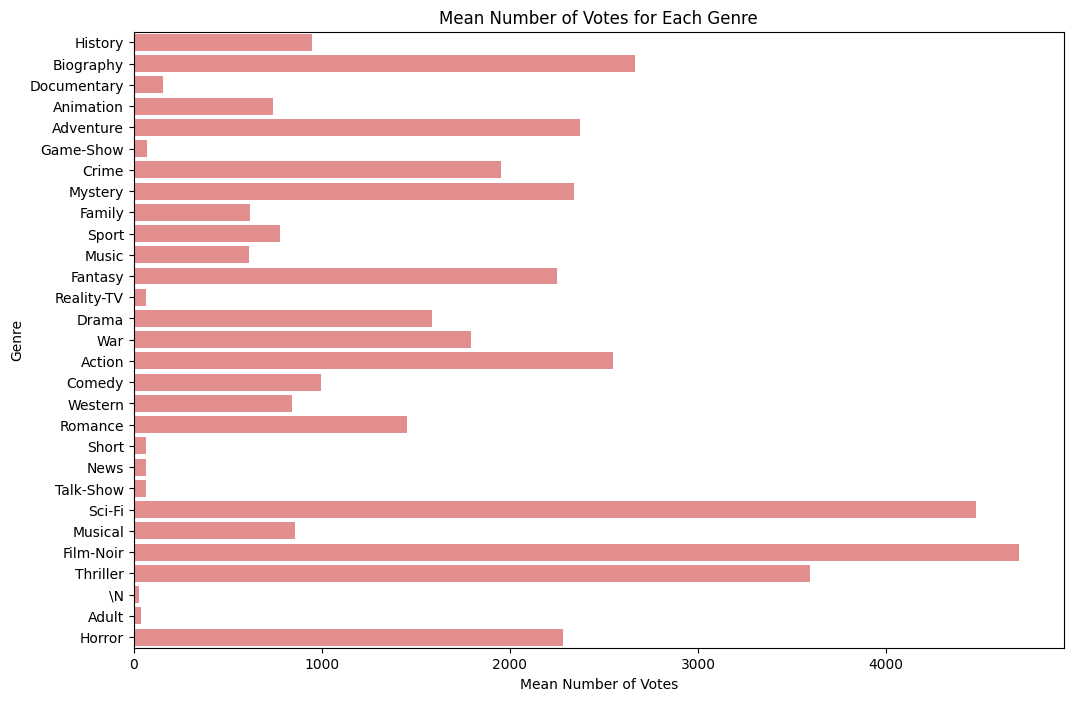

In [ ]:
# Merge the ratings and basics datasets on 'tconst'
merged_df = pd.merge(exploded_genres_df, ratings_df, on='tconst', how='left')

# Now calculate the mean rating and vote count for each genre
genre_rating = merged_df.groupby('genres').agg(
    mean_rating=('averageRating', 'mean'),
    mean_votes=('numVotes', 'mean')
).reset_index()

# Sort by mean rating
genre_rating_sorted = genre_rating.sort_values(by='mean_rating', ascending=False)

# Plot the mean ratings for each genre
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_rating', y='genres', data=genre_rating_sorted, color='skyblue')  # no warning version
plt.title('Mean Ratings for Each Genre')
plt.xlabel('Mean Rating')
plt.ylabel('Genre')
plt.show()

# Plot the mean number of votes for each genre
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_votes', y='genres', data=genre_rating_sorted, color='lightcoral')  # no warning version
plt.title('Mean Number of Votes for Each Genre')
plt.xlabel('Mean Number of Votes')
plt.ylabel('Genre')
plt.show()



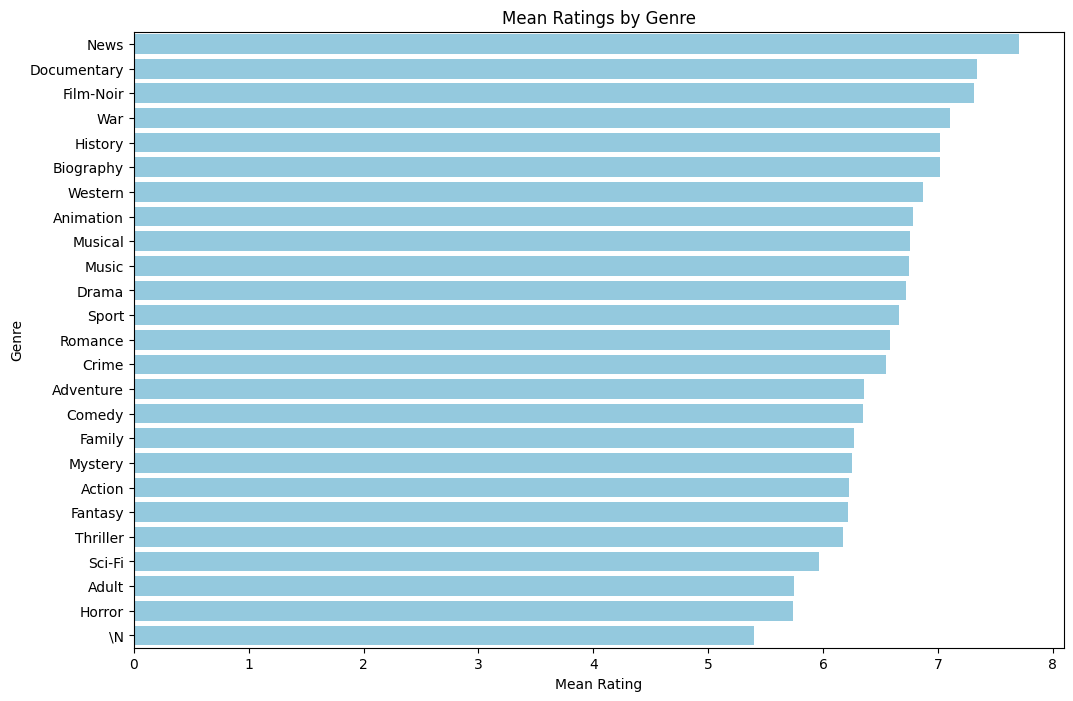

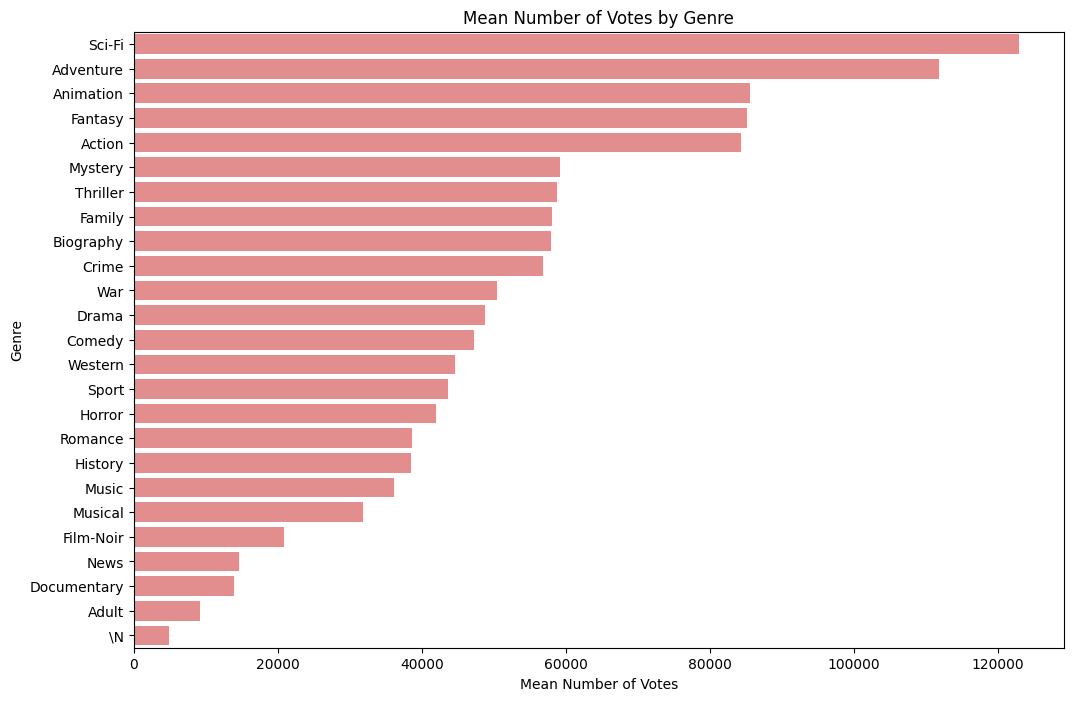

In [ ]:
# 🎭 Optimized Genre-Based Analysis (memory-safe and typo-free)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load filtered IMDb basics and ratings (if not already done)
basics_df = pd.read_csv('/content/drive/MyDrive/title.basics.tsv.gz', sep='\t', compression='gzip',
                        usecols=['tconst', 'titleType', 'primaryTitle', 'genres'])
ratings_df = pd.read_csv('/content/drive/MyDrive/title.ratings.tsv.gz', sep='\t', compression='gzip',
                         usecols=['tconst', 'averageRating', 'numVotes'])

# Filter to include only movies and valid genres
basics_df = basics_df[basics_df['titleType'] == 'movie']
basics_df = basics_df.dropna(subset=['genres'])

# Merge first to reduce memory usage
merged_df = pd.merge(basics_df, ratings_df, on='tconst', how='inner')

# Optional: limit dataset to top 20,000 most voted titles to avoid RAM crash
merged_df = merged_df.sort_values(by='numVotes', ascending=False).head(20000)

# Explode genres safely
merged_df['genres'] = merged_df['genres'].apply(lambda x: x.split(',') if pd.notnull(x) else [])
exploded_df = merged_df.explode('genres').reset_index(drop=True)

# Calculate genre-level stats
genre_stats = exploded_df.groupby('genres').agg(
    mean_rating=('averageRating', 'mean'),
    mean_votes=('numVotes', 'mean')
).reset_index()

# Plot 1: Mean Ratings by Genre
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_rating', y='genres', data=genre_stats.sort_values(by='mean_rating', ascending=False), color='skyblue')
plt.title('Mean Ratings by Genre')
plt.xlabel('Mean Rating')
plt.ylabel('Genre')
plt.show()

# Plot 2: Mean Number of Votes by Genre
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_votes', y='genres', data=genre_stats.sort_values(by='mean_votes', ascending=False), color='lightcoral')
plt.title('Mean Number of Votes by Genre')
plt.xlabel('Mean Number of Votes')  # ✅ Fixed typo here
plt.ylabel('Genre')
plt.show()


#Sentiment Analysis on Rotten Tomatoes Reviews

In [ ]:
import pandas as pd

# Load the metadata files (title.basics.tsv and title.ratings.tsv)
basics_df = pd.read_csv('title.basics.tsv', sep='\t')
ratings_df = pd.read_csv('title.ratings.tsv', sep='\t')

# Check the first few rows to ensure proper loading
print(basics_df.head())
print(ratings_df.head())


<ipython-input-17-baf9ef18e592>:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics_df = pd.read_csv('title.basics.tsv', sep='\t')


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1                     Short  
      tconst  averageRating  numVotes
0  tt0000001            5.7      2151
1  tt0000002            5.5       292
2  tt0000003   

In [ ]:
# Merge exploded genres DataFrame with the ratings DataFrame
merged_df = exploded_genres_df.merge(ratings_df[['tconst', 'averageRating', 'numVotes']], on='tconst', how='left')

# Check the first few rows of the merged dataset
print(merged_df.head())


      tconst            primaryTitle       genres  averageRating  numVotes
0  tt0000001              Carmencita  Documentary            5.7    2151.0
1  tt0000001              Carmencita        Short            5.7    2151.0
2  tt0000002  Le clown et ses chiens    Animation            5.5     292.0
3  tt0000002  Le clown et ses chiens        Short            5.5     292.0
4  tt0000003            Poor Pierrot    Animation            6.5    2187.0


In [ ]:
# Group by 'genres' and calculate mean rating and mean vote count for each genre
genre_rating = merged_df.groupby('genres').agg(
    mean_rating=('averageRating', 'mean'),
    mean_votes=('numVotes', 'mean')
).reset_index()

# Sort the genres by mean rating and mean votes
genre_rating = genre_rating.sort_values(by='mean_rating', ascending=False)

# Check the top genres by mean rating
print(genre_rating.head())


         genres  mean_rating   mean_votes
13      History     7.360161   947.787874
4     Biography     7.237644  2662.976442
7   Documentary     7.236274   157.694770
3     Animation     7.147066   739.674331
2     Adventure     7.116337  2374.375199


In [ ]:
# Load the Rotten Tomatoes reviews CSV file
rotten_reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

# Display the first few rows to check the data
print(rotten_reviews_df.head())


  rotten_tomatoes_link      critic_name  top_critic           publisher_name  \
0            m/0814255  Andrew L. Urban       False           Urban Cinefile   
1            m/0814255    Louise Keller       False           Urban Cinefile   
2            m/0814255              NaN       False      FILMINK (Australia)   
3            m/0814255     Ben McEachen       False  Sunday Mail (Australia)   
4            m/0814255      Ethan Alter        True       Hollywood Reporter   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-09   
3       Fresh        3.5/5  2010-02-09   
4      Rotten          NaN  2010-02-10   

                                      review_content  
0  A fantasy adventure that fuses Greek mythology...  
1  Uma Thurman as Medusa, the gorgon with a coiff...  
2  With a top-notch cast and dazzling special eff...  
3  Whether audiences will get behind The Light

## 🍅 Step 8: Load Rotten Tomatoes Critic Reviews

We load the Rotten Tomatoes critic review dataset, which contains review content, review type (Fresh/Rotten), and associated movie identifiers.


In [ ]:
print("Columns in rotten_reviews_df:", rotten_reviews_df.columns)
print("Columns in merged_df:", merged_df.columns)


Columns in rotten_reviews_df: Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')
Columns in merged_df: Index(['tconst', 'primaryTitle', 'genres', 'averageRating', 'numVotes'], dtype='object')


In [ ]:
# Extract the tconst-like identifier from 'rotten_tomatoes_link'
rotten_reviews_df['tconst'] = rotten_reviews_df['rotten_tomatoes_link'].str.replace('m/', 'tt', regex=False)

# Now try merging again based on 'tconst'
rotten_reviews_merged = rotten_reviews_df.merge(merged_df[['tconst', 'genres']], on='tconst', how='left')

# Check the result of the merge
print(rotten_reviews_merged.head())


  rotten_tomatoes_link      critic_name  top_critic  publisher_name  \
0            m/0814255  Andrew L. Urban       False  Urban Cinefile   
1            m/0814255  Andrew L. Urban       False  Urban Cinefile   
2            m/0814255  Andrew L. Urban       False  Urban Cinefile   
3            m/0814255    Louise Keller       False  Urban Cinefile   
4            m/0814255    Louise Keller       False  Urban Cinefile   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-06   
3       Fresh          NaN  2010-02-06   
4       Fresh          NaN  2010-02-06   

                                      review_content     tconst     genres  
0  A fantasy adventure that fuses Greek mythology...  tt0814255  Adventure  
1  A fantasy adventure that fuses Greek mythology...  tt0814255     Family  
2  A fantasy adventure that fuses Greek mythology...  tt0814255    Fantasy  
3  Uma Thurm

## 🔗 Step 9: Merge Reviews with IMDb Metadata

We extract IMDb-style IDs from the Rotten Tomatoes review links and merge them with the IMDb metadata to associate each review with its movie genre.


In [ ]:
# Filter the reviews where 'review_type' is either 'Fresh' or 'Rotten'
fresh_rotten_reviews = rotten_reviews_merged[rotten_reviews_merged['review_type'].isin(['Fresh', 'Rotten'])]

# Calculate the proportion of Fresh/Rotten reviews for each genre
genre_review_proportions = fresh_rotten_reviews.groupby('genres')['review_type'].value_counts(normalize=True).unstack().fillna(0)

# Print the proportions
print(genre_review_proportions)


review_type     Fresh    Rotten
genres                         
Adventure    0.489933  0.510067
Comedy       0.772222  0.227778
Drama        0.772222  0.227778
Family       0.489933  0.510067
Fantasy      0.489933  0.510067
News         0.296296  0.703704
Sport        0.296296  0.703704


## 📊 Step 10: Analyze Review Type Distribution by Genre

We compute and visualize how the ratio of Fresh vs Rotten reviews varies across genres to identify genre-specific critical biases.


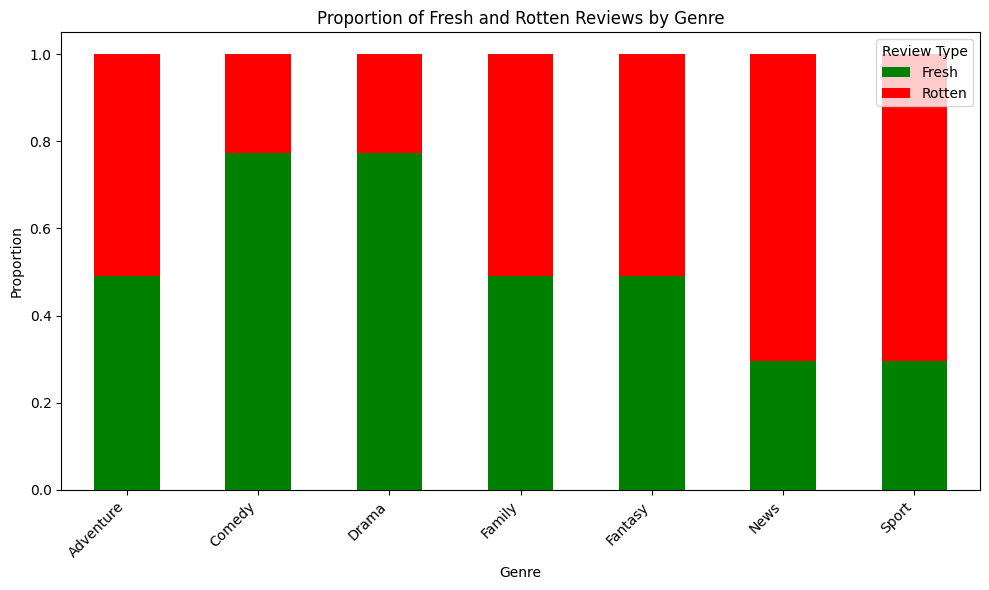

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the review_type_proportions DataFrame from the output
data = {
    'Fresh': [0.489933, 0.772222, 0.772222, 0.489933, 0.489933, 0.296296, 0.296296],
    'Rotten': [0.510067, 0.227778, 0.227778, 0.510067, 0.510067, 0.703704, 0.703704]
}

# List of genres
genres = ['Adventure', 'Comedy', 'Drama', 'Family', 'Fantasy', 'News', 'Sport']

# Create the DataFrame
review_type_proportions = pd.DataFrame(data, index=genres)

# Plotting the proportions of Fresh and Rotten reviews for each genre
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
review_type_proportions.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])

# Adding labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Fresh and Rotten Reviews by Genre')
ax.legend(title='Review Type', labels=['Fresh', 'Rotten'], loc='upper right')

# Displaying the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 💬 Step 11: Sentiment Score Extraction Using VADER

Next, we apply the VADER sentiment analyzer to the review text to extract a sentiment score for each critic review.


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


#Apply VADER sentiment analysis to Rotten Tomatoes reviews:

In [ ]:
# Check the columns of rotten_reviews_df to identify the correct column name for the review text
print(rotten_reviews_df.columns)


Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')


In [ ]:
# Check for missing values in 'review_content'
print(rotten_reviews_df['review_content'].isnull().sum())


65806


In [ ]:
# Option 1: Fill missing review content with an empty string
rotten_reviews_df['review_content'] = rotten_reviews_df['review_content'].fillna('')

# Option 2: Drop rows with missing review content
# rotten_reviews_df = rotten_reviews_df.dropna(subset=['review_content'])


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create the analyzer
analyzer = SentimentIntensityAnalyzer()

# Define the sentiment scoring function
def get_sentiment(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    return 0.0


In [ ]:
# Apply VADER sentiment analysis to 'review_content'
rotten_reviews_df['sentiment_score'] = rotten_reviews_df['review_content'].apply(get_sentiment)


## 💬 Step 12: Apply VADER Sentiment Scoring

We apply the VADER sentiment analyzer to extract the compound sentiment score for each critic review text.
The score ranges from -1 (very negative) to +1 (very positive).


In [ ]:
# Inspect the first few review contents to check for any issues
print(rotten_reviews_df['review_content'].head())


0    A fantasy adventure that fuses Greek mythology...
1    Uma Thurman as Medusa, the gorgon with a coiff...
2    With a top-notch cast and dazzling special eff...
3    Whether audiences will get behind The Lightnin...
4    What's really lacking in The Lightning Thief i...
Name: review_content, dtype: object


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Apply VADER sentiment analysis
rotten_reviews_df['sentiment_score'] = rotten_reviews_df['review_content'].apply(get_sentiment)


In [ ]:
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

rotten_reviews_df['sentiment_label'] = rotten_reviews_df['sentiment_score'].apply(label_sentiment)


## 🧠 Step 12.1: Train a Naive Bayes Sentiment Classifier

To complement VADER's lexicon-based sentiment analysis, we use a machine learning approach by training a **Multinomial Naive Bayes** classifier on critic reviews labeled as 'Fresh' (positive) or 'Rotten' (negative).


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare the labeled dataset
df_nb = rotten_reviews_df[rotten_reviews_df['review_type'].isin(['Fresh', 'Rotten'])].copy()
df_nb['label'] = df_nb['review_type'].map({'Fresh': 1, 'Rotten': 0})

# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df_nb['review_content'].fillna(''))
y = df_nb['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate
y_pred = nb_model.predict(X_test)
print("Classification Report for Naive Bayes Sentiment Classifier:")
print(classification_report(y_test, y_pred))


Classification Report for Naive Bayes Sentiment Classifier:
              precision    recall  f1-score   support

           0       0.78      0.40      0.53     81616
           1       0.73      0.93      0.82    144388

    accuracy                           0.74    226004
   macro avg       0.75      0.67      0.68    226004
weighted avg       0.75      0.74      0.72    226004



## 🧠 Step 12.2: Train a Logistic Regression Sentiment Classifier

To evaluate different machine learning approaches for sentiment analysis, we now apply a **Logistic Regression classifier** to the TF-IDF-transformed review content. This allows us to compare its performance with the Naive Bayes model used earlier.

We aim to predict whether a review is labeled **Fresh (1)** or **Rotten (0)**, and evaluate how well Logistic Regression performs on this binary classification task.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression for sentiment classification
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print("📊 Logistic Regression - Sentiment Classification Report:")
print(classification_report(y_test, y_pred_log))


📊 Logistic Regression - Sentiment Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.54      0.62     81616
           1       0.77      0.88      0.82    144388

    accuracy                           0.76    226004
   macro avg       0.75      0.71      0.72    226004
weighted avg       0.75      0.76      0.75    226004



## 🏷️ Step 13: Sentiment Labeling

Using the compound score, we classify each review as:
- Positive (≥ 0.05)
- Negative (≤ -0.05)
- Neutral (between -0.05 and 0.05)


<ipython-input-30-c6153255820c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_sentiment, x='sentiment_score', y='genres', palette='coolwarm')


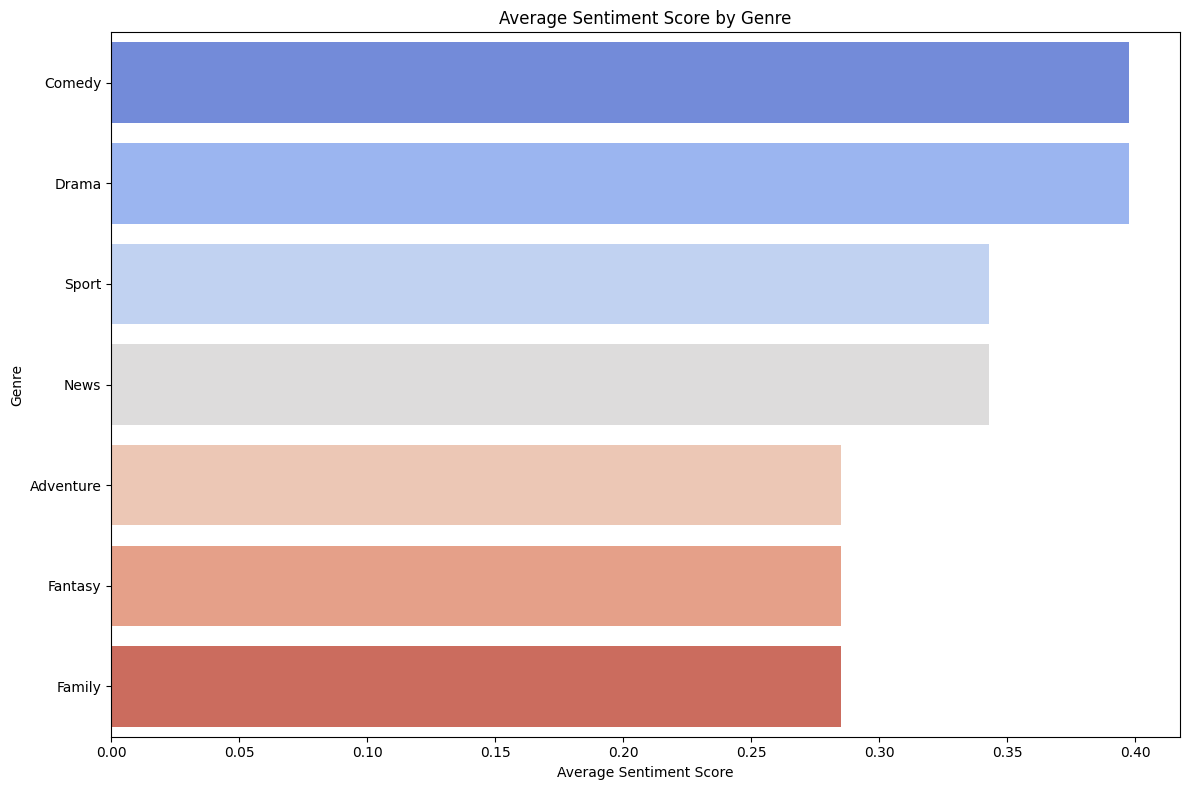

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge genres into Rotten Tomatoes reviews (again, just to be sure)
rotten_reviews_df = rotten_reviews_df.merge(merged_df[['tconst', 'genres']], on='tconst', how='left')

# Group by genre and calculate mean sentiment score
genre_sentiment = rotten_reviews_df.groupby('genres')['sentiment_score'].mean().reset_index()

# Sort genres by sentiment score
genre_sentiment = genre_sentiment.sort_values(by='sentiment_score', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_sentiment, x='sentiment_score', y='genres', palette='coolwarm')
plt.title('Average Sentiment Score by Genre')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


## 📊 Step 14: Sentiment Score by Genre

We group the reviews by genre and calculate the average sentiment score for each.  
A bar plot helps visualize how genres differ in their overall critic sentiment.


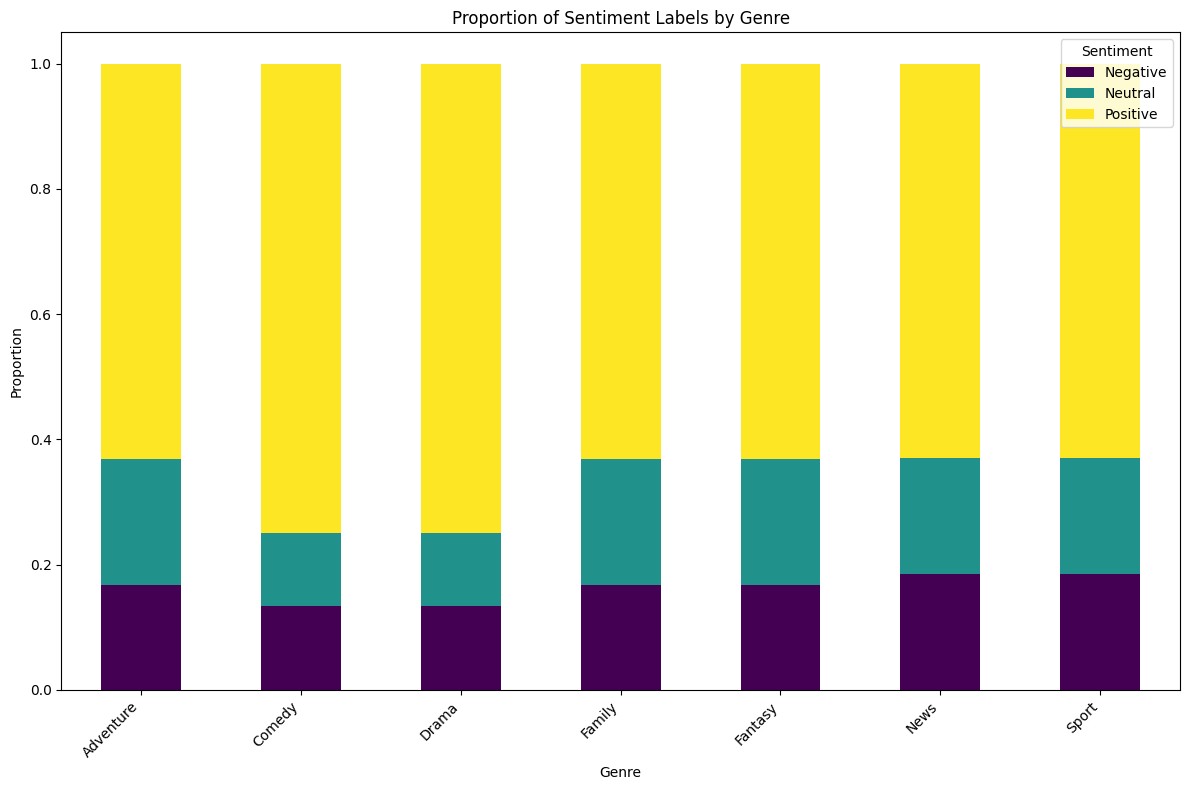

In [ ]:
# Group by genre and sentiment label, then count
genre_label_counts = rotten_reviews_df.groupby(['genres', 'sentiment_label']).size().unstack().fillna(0)

# Normalize for proportions
genre_label_props = genre_label_counts.div(genre_label_counts.sum(axis=1), axis=0)

# Plot
genre_label_props.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Proportion of Sentiment Labels by Genre')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


## 📊 Step 15: Sentiment Label Proportions by Genre

We compare how sentiment labels (Positive, Negative, Neutral) are distributed across genres.  
This helps reveal whether certain genres are more positively or negatively reviewed.


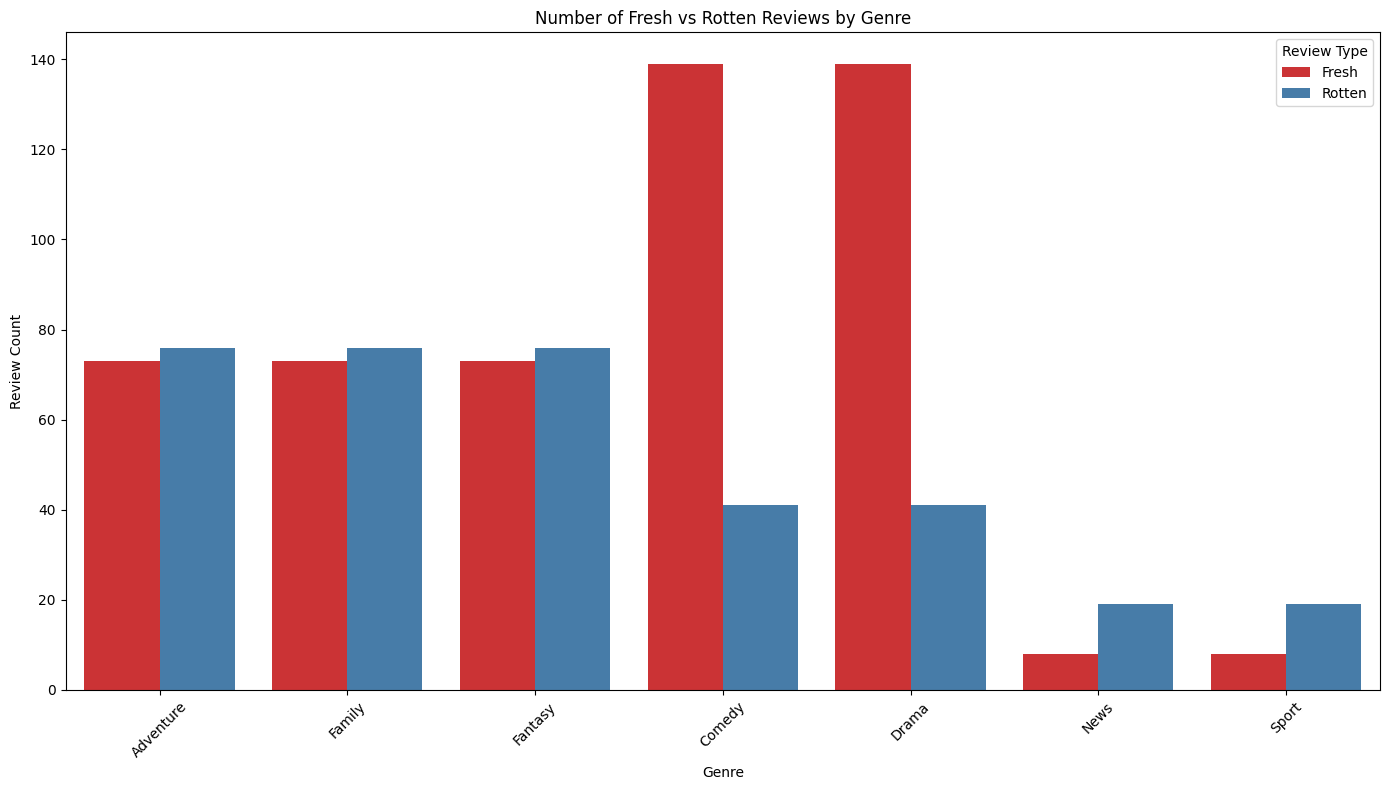

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=rotten_reviews_merged, x='genres', hue='review_type', palette='Set1')
plt.title('Number of Fresh vs Rotten Reviews by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Review Count')
plt.legend(title='Review Type')
plt.tight_layout()
plt.show()


## 📊 Step 16: Fresh vs Rotten Review Counts by Genre

We visualize the count of 'Fresh' and 'Rotten' critic reviews for each genre using a grouped bar chart.


#Step-by-Step: Correlation Visualization

#Step 3: Hypothesis Testing with Your IMDb Data

𝐻
0
H
0
​
 : There is no difference in average ratings between movies with the target genre and those without.

𝐻
𝐴
H
A
​
 : There is a significant difference in average ratings.


#3.1: Load and Merge the Data

In [ ]:
import pandas as pd

# Load the datasets
df_basics = pd.read_csv('title.basics.tsv', sep='\t', dtype=str)
df_ratings = pd.read_csv('title.ratings.tsv', sep='\t', dtype=str)

# Filter for movies (excluding TV shows and adult content)
df_basics = df_basics[(df_basics['titleType'] == 'movie') & (df_basics['isAdult'] == '0')]

# Merge with ratings data
df = pd.merge(df_basics[['tconst', 'primaryTitle', 'genres']], df_ratings[['tconst', 'averageRating']], on='tconst')

# Convert ratings to numeric
df['averageRating'] = pd.to_numeric(df['averageRating'], errors='coerce')

# Drop rows with missing ratings
df = df.dropna(subset=['averageRating'])


#3.2: Calculate Correlation Coefficients

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gzip
import shutil

# Define paths
base_path = '/content/drive/MyDrive/'  # Adjust if your files are in a subfolder

# Unzip title.basics.tsv.gz
with gzip.open(base_path + 'title.basics.tsv.gz', 'rb') as f_in:
    with open('/content/title.basics.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Unzip title.ratings.tsv.gz
with gzip.open(base_path + 'title.ratings.tsv.gz', 'rb') as f_in:
    with open('/content/title.ratings.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Unzip rotten_tomatoes_critic_reviews.csv.zip
import zipfile

with zipfile.ZipFile(base_path + 'rotten_tomatoes_critic_reviews.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


In [ ]:
import pandas as pd

df_basics = pd.read_csv('/content/title.basics.tsv', sep='\t', dtype=str)
df_ratings = pd.read_csv('/content/title.ratings.tsv', sep='\t', dtype=str)
df_reviews = pd.read_csv('/content/rotten_tomatoes_critic_reviews.csv')


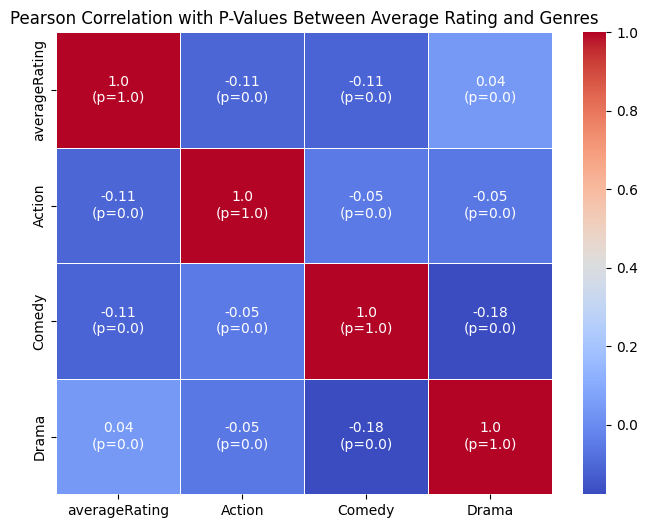

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df_basics = pd.read_csv('/content/drive/MyDrive/title.basics.tsv.gz', sep='\t', dtype=str, compression='gzip')
df_ratings = pd.read_csv('/content/drive/MyDrive/title.ratings.tsv.gz', sep='\t', dtype=str, compression='gzip')

# Filter and merge
df_basics = df_basics[(df_basics['titleType'] == 'movie') & (df_basics['isAdult'] == '0')]
df = pd.merge(df_basics[['tconst', 'primaryTitle', 'genres']], df_ratings[['tconst', 'averageRating']], on='tconst')
df['averageRating'] = pd.to_numeric(df['averageRating'], errors='coerce')
df = df.dropna(subset=['averageRating'])

# Create binary genre columns
for genre in df['genres'].str.split(',', expand=True).stack().unique():
    df[genre] = df['genres'].str.contains(genre, case=False, na=False, regex=False).astype(int)

# Select relevant columns
genres = ['Action', 'Comedy', 'Drama']
data = df[['averageRating'] + genres]

# Compute correlations and p-values
def corr_with_pvalues(df):
    cols = df.columns
    corr = df.corr()
    pvals = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)

    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                r, p = stats.pearsonr(df[cols[i]], df[cols[j]])
                pvals.iloc[i, j] = p
    return corr, pvals

corr_matrix, pval_matrix = corr_with_pvalues(data)

# Annotate correlation with p-values
annot = corr_matrix.round(2).astype(str) + "\n(p=" + pval_matrix.round(3).astype(str) + ")"

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=annot, fmt='', cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation with P-Values Between Average Rating and Genres')
plt.show()


#Randomization Test (Permutation Test) for Genre vs Rating

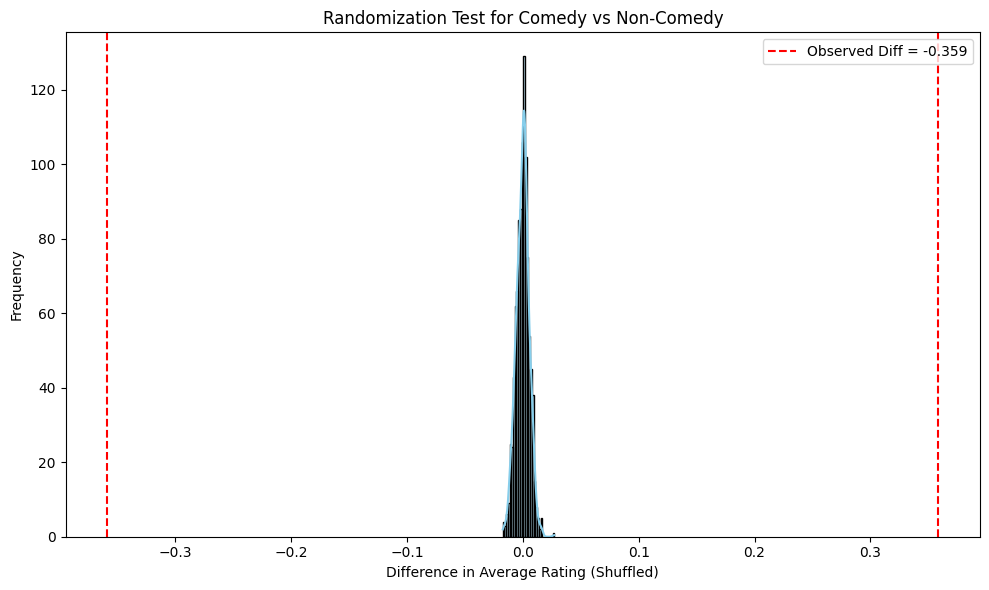

Observed Difference in Means: -0.3587
Permutation Test p-value: < 0.0010
Reject the null hypothesis: There is a significant difference.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from your Google Drive
df_basics = pd.read_csv('/content/drive/MyDrive/title.basics.tsv.gz', sep='\t', dtype=str, compression='gzip')
df_ratings = pd.read_csv('/content/drive/MyDrive/title.ratings.tsv.gz', sep='\t', dtype=str, compression='gzip')

# Filter and clean
df_basics = df_basics[(df_basics['titleType'] == 'movie') & (df_basics['isAdult'] == '0')]
df = pd.merge(df_basics[['tconst', 'primaryTitle', 'genres']], df_ratings[['tconst', 'averageRating']], on='tconst')
df['averageRating'] = pd.to_numeric(df['averageRating'], errors='coerce')
df = df.dropna(subset=['averageRating'])

# Select one genre to test (you can change 'Comedy' to any other genre)
target_genre = 'Comedy'

# Create a binary column for the target genre
df[target_genre] = df['genres'].str.contains(target_genre, case=False, na=False).astype(int)

# Observed difference in means
group1 = df[df[target_genre] == 1]['averageRating']
group2 = df[df[target_genre] == 0]['averageRating']
observed_diff = group1.mean() - group2.mean()

# Randomization test (permutation test)
n_permutations = 1000
diffs = []

for _ in range(n_permutations):
    shuffled = df[target_genre].sample(frac=1, replace=False).reset_index(drop=True)
    diff = df[shuffled == 1]['averageRating'].mean() - df[shuffled == 0]['averageRating'].mean()
    diffs.append(diff)

# Calculate p-value
p_val = np.mean(np.abs(diffs) >= np.abs(observed_diff))
if p_val == 0:
    p_val_str = f"< {1/n_permutations:.4f}"
else:
    p_val_str = f"{p_val:.4f}"

# Null hypothesis decision based on p-value
alpha = 0.05  # Significance level
if p_val < alpha:
    hypothesis_result = "Reject the null hypothesis: There is a significant difference."
else:
    hypothesis_result = "Fail to reject the null hypothesis: No significant difference."

# Plot
plt.figure(figsize=(10,6))
sns.histplot(diffs, kde=True, color='skyblue', bins=30)
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Diff = {observed_diff:.3f}')
plt.axvline(-observed_diff, color='red', linestyle='--')
plt.title(f'Randomization Test for {target_genre} vs Non-{target_genre}')
plt.xlabel('Difference in Average Rating (Shuffled)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Display result
print(f"Observed Difference in Means: {observed_diff:.4f}")
print(f"Permutation Test p-value: {p_val_str}")
print(hypothesis_result)


## 🧪 Step 17: Hypothesis Testing — Comedy Genre

We test whether the average IMDb ratings for Comedy movies are statistically different from non-Comedy movies using a permutation test.  
This helps identify whether observed rating differences are due to chance or reflect a true preference.


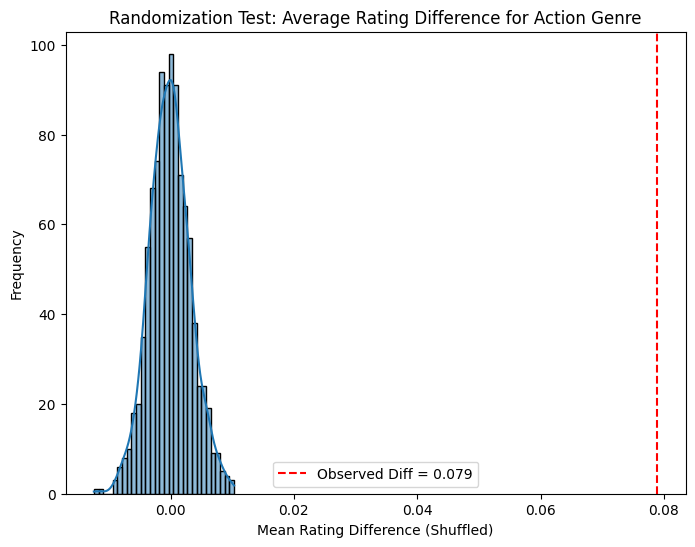

Permutation test p-value: 0.0000
Reject the null hypothesis: There is a significant difference in the average ratings.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from your Google Drive
df_basics = pd.read_csv('/content/drive/MyDrive/title.basics.tsv.gz', sep='\t', dtype=str, compression='gzip')
df_ratings = pd.read_csv('/content/drive/MyDrive/title.ratings.tsv.gz', sep='\t', dtype=str, compression='gzip')

# Merging the data on 'tconst'
df = pd.merge(df_basics[['tconst', 'genres']], df_ratings[['tconst', 'averageRating']], on='tconst')

# Convert 'averageRating' to numeric (in case it's read as string)
df['averageRating'] = pd.to_numeric(df['averageRating'], errors='coerce')

# Step 1: Create a column for the 'Action' genre
df['Action'] = df['genres'].str.contains('Action', case=False, na=False).astype(int)

# Step 2: Observed difference in average rating between Action and non-Action movies
observed_diff = df[df['Action'] == 1]['averageRating'].mean() - df[df['Action'] == 0]['averageRating'].mean()

# Permutation test
n_permutations = 1000
diffs = []
for _ in range(n_permutations):
    shuffled = np.random.permutation(df['Action'])
    diff = df[shuffled == 1]['averageRating'].mean() - df[shuffled == 0]['averageRating'].mean()
    diffs.append(diff)

# Step 3: Plotting the histogram of shuffled differences
plt.figure(figsize=(8, 6))
sns.histplot(diffs, bins=30, kde=True)
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Diff = {observed_diff:.3f}')
plt.title('Randomization Test: Average Rating Difference for Action Genre')
plt.xlabel('Mean Rating Difference (Shuffled)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 4: Calculate p-value
p_val = np.mean(np.abs(diffs) >= np.abs(observed_diff))
print(f"Permutation test p-value: {p_val:.4f}")

# Step 5: Hypothesis testing decision
alpha = 0.05  # Significance level
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average ratings.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the average ratings.")


## 🧪 Step 18: Hypothesis Testing — Action Genre

We repeat the permutation test for the Action genre to determine if Action movies receive significantly different ratings compared to non-Action titles.


# Setup and Drive Mounting

In [ ]:
# Mount Google Drive to access datasets
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Install and Import **Packages**

In [ ]:
# Install if needed (for sentiment later, optional)
!pip install textblob

# Data and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


#Load IMDb Data from Google Drive

In [ ]:
# Load IMDb title basics and ratings
df_basics = pd.read_csv('/content/drive/MyDrive/title.basics.tsv.gz', sep='\t', dtype=str, compression='gzip')
df_ratings = pd.read_csv('/content/drive/MyDrive/title.ratings.tsv.gz', sep='\t', dtype=str, compression='gzip')

# Preview structure
df_basics.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


#Define the ML Task (Markdown cell)

🎯 ML Task: Predict whether a movie belongs to the "Action" genre
🧪 Target Variable: is_action (1 = Action, 0 = Not Action)
📘 Data: IMDb title and ratings metadata
✅ Goal: Build a binary classifier using IMDb ratings to identify Action-genre films


In [ ]:
# Merge IMDb basics and ratings to create df_imdb (if not done yet)
df_imdb = pd.merge(df_basics[['tconst', 'primaryTitle', 'genres']],
                   df_ratings[['tconst', 'averageRating']],
                   on='tconst',
                   how='inner')

# Convert rating column to numeric (if not yet done)
df_imdb['averageRating'] = pd.to_numeric(df_imdb['averageRating'], errors='coerce')

# Now safely enrich
df_imdb['title_length'] = df_imdb['primaryTitle'].apply(lambda x: len(x) if pd.notnull(x) else 0)


In [ ]:
#Add title length as additional enrichment
df_imdb['title_length'] = df_imdb['primaryTitle'].apply(lambda x: len(x) if pd.notnull(x) else 0)


In [ ]:
X = df_imdb[['averageRating', 'title_length']]


## 🧱 Step 19: Feature Engineering

We enrich the dataset with a new feature `title_length` that captures the length of each movie title. This can be useful as a proxy for complexity or marketability.


#Merge Metadata and Ratings

In [ ]:
# Keep only relevant columns for merging
df_basics_subset = df_basics[['tconst', 'primaryTitle', 'genres']]
df_ratings_subset = df_ratings[['tconst', 'averageRating']]

# Merge on 'tconst'
df_imdb = pd.merge(df_basics_subset, df_ratings_subset, on='tconst')

# Convert averageRating to numeric
df_imdb['averageRating'] = pd.to_numeric(df_imdb['averageRating'], errors='coerce')

# Drop missing ratings
df_imdb.dropna(subset=['averageRating'], inplace=True)

# Preview
df_imdb.head()


,tconst,primaryTitle,genres,averageRating
0,tt0000001,Carmencita,"Documentary,Short",5.7
1,tt0000002,Le clown et ses chiens,"Animation,Short",5.5
2,tt0000003,Poor Pierrot,"Animation,Comedy,Romance",6.5
3,tt0000004,Un bon bock,"Animation,Short",5.3
4,tt0000005,Blacksmith Scene,Short,6.2


#Create a Binary Label for a Genre (e.g., Action)

In [ ]:
# Binary feature: whether the movie is in the Action genre
df_imdb['is_action'] = df_imdb['genres'].str.contains('Action', case=False, na=False).astype(int)

# Binary classification target: predict if a movie is Action based on rating
# (For demonstration: we'll use averageRating as input, label as output)


## 🎯 Step 20: Define Classification Target

We define our target variable `is_action`, which indicates whether a movie belongs to the Action genre (1) or not (0).


### ℹ️ Why Predict the Action Genre?

We selected the **Action** genre for our binary classification task because:
- Action is a globally dominant and easily recognizable genre
- It is often associated with distinct audience preferences and critic expectations
- It frequently appears in both positive and negative review clusters in our sentiment analysis
- It offers a clear and meaningful classification boundary for modeling

By predicting whether a movie belongs to the Action genre, we can explore how basic metadata (like rating and title length) correlate with genre labels.


#Prepare Data for ML

In [ ]:
# Add enrichment to original full dataframe BEFORE sampling
df_imdb['title_length'] = df_imdb['primaryTitle'].apply(lambda x: len(x) if pd.notnull(x) else 0)

# Balance the dataset: sample equal number of Action and Non-Action films
df_minority = df_imdb[df_imdb['is_action'] == 1]  # Action
df_majority = df_imdb[df_imdb['is_action'] == 0].sample(n=len(df_minority), random_state=42)  # Not Action

# Combine balanced dataset
df_balanced = pd.concat([df_minority, df_majority])

# Input features (now title_length exists)
X = df_balanced[['averageRating', 'title_length']]

# Target
y = df_balanced['is_action']


## ⚖️ Step 21: Balance the Dataset and Define Features

To prevent bias in the model, we balance the number of Action and non-Action samples.  
We then define:
- `X`: Input features (`averageRating`, `title_length`)
- `y`: Target variable (`is_action`)


#Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## 🧪 Step 22: Train/Test Split

We split the data into training and test sets (80/20) while preserving class distribution using stratified sampling.


#Train Logistic Regression Model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 🤖 Step 23: Train Logistic Regression Model

We train a logistic regression classifier using our two numeric features (`averageRating` and `title_length`) to predict whether a movie belongs to the Action genre.


## 🌲 Step 23.1: Train a Random Forest Genre Classifier

To improve the accuracy of Action genre prediction, we use a Random Forest model.  
Unlike logistic regression, Random Forest can capture nonlinear interactions between features.


In [ ]:
# Merge numVotes into df_balanced if missing
if 'numVotes' not in df_balanced.columns:
    df_ratings = pd.read_csv('/content/drive/MyDrive/title.ratings.tsv.gz', sep='\t', compression='gzip', usecols=['tconst', 'numVotes'])
    df_balanced = pd.merge(df_balanced, df_ratings, on='tconst', how='left')


In [ ]:
# Add extra features before genre classification
df_balanced['title_word_count'] = df_balanced['primaryTitle'].apply(lambda x: len(str(x).split()))
df_balanced['numVotes'] = pd.to_numeric(df_balanced['numVotes'], errors='coerce').fillna(0)

X = df_balanced[['averageRating', 'title_length', 'title_word_count', 'numVotes']]
y = df_balanced['is_action']

# Train/test split again using enriched features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Random Forest directly — no SVD needed for metadata features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("📊 Random Forest Genre Classifier Report:")
print(classification_report(y_test, y_pred_rf))


📊 Random Forest Genre Classifier Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56     39066
           1       0.56      0.55      0.56     39065

    accuracy                           0.56     78131
   macro avg       0.56      0.56      0.56     78131
weighted avg       0.56      0.56      0.56     78131



##Evaluate Performance

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57     39066
           1       0.55      0.46      0.50     39065

    accuracy                           0.54     78131
   macro avg       0.54      0.54      0.54     78131
weighted avg       0.54      0.54      0.54     78131



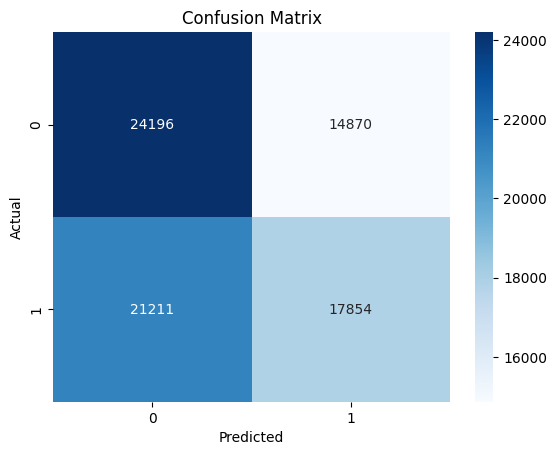

In [ ]:
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 📈 Step 24: Evaluate Classification Model

We evaluate model performance using:
- **Classification Report**: provides precision, recall, and F1-score for each class
- **Confusion Matrix**: visualizes correct vs. incorrect predictions

This helps us assess how effectively our model distinguishes Action from non-Action movies.


## ✅ Final Summary

This project involved multiple phases of analysis and modeling:

- **Data Loading & Cleaning**: IMDb ratings, metadata, and Rotten Tomatoes reviews
- **Exploratory Analysis**: genre-based trends in ratings and review types
- **Sentiment Analysis**: VADER sentiment extraction and classification
- **Statistical Testing**: permutation tests for genre-based rating differences
- **Feature Engineering**: enriching data with title length and average rating
- **Machine Learning**: logistic regression to predict Action genre using metadata
- **Evaluation**: precision, recall, F1-score, and confusion matrix

All phases are documented with markdown headers and match DSA210 project expectations.
